In [1]:
import pandas as pd 
import os 
import itertools
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import regex as re
# for subdir in os.scandir('../outputs/test/'):
    # for file_n in os.path.join(subdir.path,'progress.csv'):


In [2]:
def calc_time_deltas(df): 
    last_start = 0
    times = []
    for i,row in df.iterrows(): 
        t = row['Elapsed_time']
        times.append(t-last_start)
        last_start = t
    
    return times, np.mean(times)

In [3]:

params = list(itertools.product(['pct','pt'],['normal','tome_ft','tome_xyz','random']))


dfs = {}
best_rows = {}
for file_n,(model_n, ds_n) in zip(range(len(params)),params):
        df = pd.read_csv(f'../outputs/test/{file_n+1}/progress.csv')
        df['elapsed_time'],avg_time = calc_time_deltas(df)
        # display(df)
        if len(df != 0):
            best_iter = df['V_Accuracy'].argmax()
            best_feats = pd.DataFrame(df.iloc[best_iter]).T.reset_index(drop=True)
            best_feats = best_feats.assign(**{'model':model_n, 'method':ds_n,'test_n' : file_n,'best_iter':best_iter,'avg_time':avg_time})
            # display(best_feats)
            # print(file_n+1,best_iter, df['T_Accuracy'][best_iter],df['V_Accuracy'][best_iter])
            dfs[file_n] = df.assign(model=model_n, method=ds_n,test_n = file_n)
            best_rows[file_n] = best_feats.iloc[0].copy()
model_bests = pd.DataFrame(best_rows).T.set_index('test_n')
model_bests


,step,T_Loss,T_Accuracy,T_Precision,T_Recall,T_F1,V_Loss,V_Accuracy,V_Precision,V_Recall,V_F1,Elapsed_time,elapsed_time,model,method,best_iter,avg_time
test_n,,,,,,,,,,,,,,,,,
0,5541.0,0.824604,0.768389,0.638056,0.633264,0.62851,0.619394,0.820305,0.77835,0.764133,0.743794,26239.013,2601.997,pct,normal,9,2623.9013
1,5541.0,1.020361,0.704355,0.56267,0.555595,0.550257,0.839636,0.768528,0.669098,0.672993,0.65647,24597.062,2449.104,pct,tome_ft,9,2459.7062
2,5541.0,1.040508,0.696232,0.547276,0.542901,0.536074,0.8149,0.771574,0.729036,0.675951,0.668677,25657.498,2738.76,pct,tome_xyz,9,2565.7498
3,1663.0,1.703881,0.551151,0.391845,0.405164,0.387219,1.370074,0.654822,0.569668,0.516921,0.509056,7369.363,2527.041,pct,random,2,2456.454333
4,16067.0,1.618725,0.508619,0.356293,0.373363,0.352542,1.514877,0.556345,0.494125,0.415145,0.414131,19333.839,643.8,pt,normal,28,665.566233
5,16621.0,2.155606,0.365275,0.231374,0.25483,0.230078,2.023705,0.406091,0.27716,0.274654,0.249129,18744.726,585.684,pt,tome_ft,29,624.8242
6,7757.0,1.902512,0.425064,0.268232,0.301405,0.266716,1.907813,0.428426,0.308518,0.288744,0.274661,15221.006,547.045,pt,tome_xyz,27,542.487933
7,3325.0,2.338223,0.30528,0.170907,0.212804,0.177717,2.219885,0.338071,0.205228,0.214599,0.181062,3794.586,619.821,pt,random,5,633.2083


<Axes: title={'center': 'Comparison of metrics for pct'}, xlabel='method', ylabel='value'>

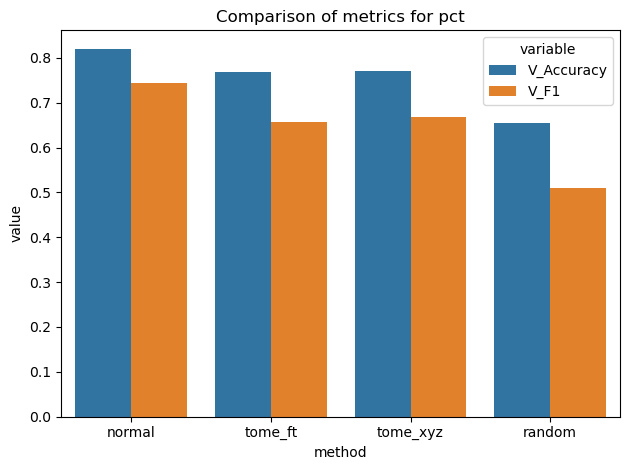

In [4]:

def plot_things(df,x, to_plot,refs,model='pct',figname='figure'):

    melted = df[df.model == model][to_plot + refs + x ].melt(id_vars =refs).set_index(refs)
    ax = sns.barplot(melted,x='method',y='value',hue='variable')
    ax.set_title(f'Comparison of metrics for {model}')
    plt.tight_layout()
    plt.savefig(f'../outputs/figures/{figname}.png')

    return ax


to_plot = ['V_Accuracy','V_F1']
refs = ['method']
x = ['V_Accuracy','V_F1']

plot_things(model_bests,x,to_plot,refs,model='pct',figname='pct_accs')

<Axes: title={'center': 'Comparison of metrics for pt'}, xlabel='method', ylabel='value'>

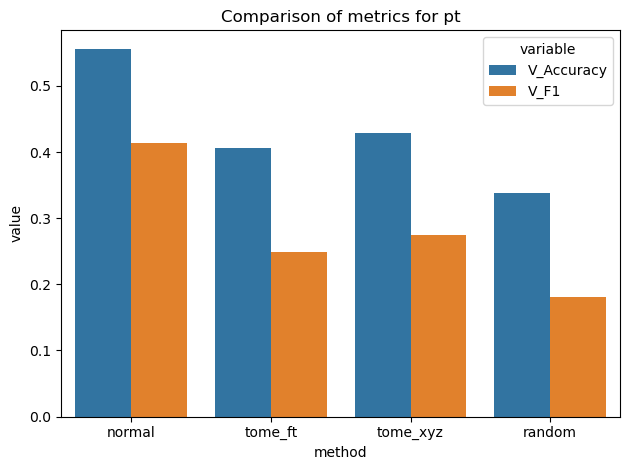

In [5]:
plot_things(model_bests,x,to_plot,refs,model='pt',figname='pt_accs')

# Comparison of added downsampling:

In [6]:
show_cols = ['T_Accuracy','V_Accuracy','V_F1','model','method','more','best_iter','test_n','avg_time']
data_cols = ['T_Loss','T_Accuracy','T_Precision','T_Recall','T_F1','V_Loss','V_Accuracy','V_Precision','V_Recall','V_F1']

best_unprune = {}
for dir_ in os.scandir('../outputs/futher_prune'): 
    if re.match(r'pc?t_.*',dir_.name):
        model = 'pct' if  'pct' in dir_.name else 'pt'
        df = pd.read_csv(os.path.join(dir_.path,'progress.csv'))
        df['elapsed_time'],avg_time = calc_time_deltas(df)
        best_iter = df['V_Accuracy'].argmax()


        best_feats = pd.DataFrame(df.iloc[best_iter]).T.reset_index(drop=True)
        metadata = {'model':model, 'method':'normal','further_ds_fac':0.0,'best_iter':best_iter,'avg_time':avg_time}
        best_feats = best_feats.assign(**metadata)
            # display(best_feats)
            # print(file_n+1,best_iter, df['T_Accuracy'][best_iter],df['V_Accuracy'][best_iter])
        best_unprune[len(best_unprune)] = best_feats.iloc[0].copy()

unpruned = pd.DataFrame(best_unprune).T
unpruned_avg = unpruned.groupby('model').agg({c: 'mean' if c in data_cols else 'first' for c in unpruned.columns})
unpruned_avg[[c for c in show_cols if c in unpruned_avg.columns]]#.set_index('test_n')

,T_Accuracy,V_Accuracy,V_F1,model,method,best_iter,avg_time
model,,,,,,,
pct,0.84448,0.85753,0.805795,pct,normal,17,620.86015
pt,0.845487,0.851777,0.780892,pt,normal,14,779.86275


In [7]:
best_prune = []
superdirs = [f'../outputs/futher_prune_{n}' for n in [3,4,5]]
for superdir in superdirs: 
    for dir_ in os.scandir(superdir): 
        if re.match(r'pc?t_.*',dir_.name):
            # get parameters from naming scheme
            model = 'pct' if  'pct' in dir_.name else 'pt'
            base_ds = 'normal' if 'ds_normal' in dir_.name else 'tome_ft'
            if '_more' in dir_.name: 
                further_ds = True
                downsample_factor =  0.3
            elif 'no_ds' in dir_.name: 
                further_ds = False
                downsample_factor =  0.0
            else: 
                further_ds = True
                downsample_factor =  0.15
            # print(dir_.name,'pct' in dir_.name)


            df = pd.read_csv(os.path.join(dir_.path,'progress.csv'))
            df['elapsed_time'],avg_time = calc_time_deltas(df)

            best_iter = df['V_Accuracy'].argmax()
            metadata = {'model':model, 'method':base_ds,'further_ds_fac':downsample_factor,'test_n' : len(best_prune),'best_iter':best_iter,'avg_time':avg_time}
            print(dir_.name, metadata)
            df = df.assign(**metadata)

            best_feats = pd.DataFrame(df.iloc[best_iter]).T.reset_index(drop=True)
            # best_feats = best_feats.assign(**{'model':model, 'method':base_ds,'further_ds_fac':downsample_factor,'test_n' : len(best_unprune),'best_iter':best_iter})
                # display(best_feats)
                # print(file_n+1,best_iter, df['T_Accuracy'][best_iter],df['V_Accuracy'][best_iter])
            best_prune.append(best_feats.iloc[0])

pruned = pd.DataFrame(best_prune)

show_cols = ['T_Accuracy','V_Accuracy','V_F1','model','method','best_iter','test_n']

pruned#[show_cols]

pt_tome_no_ds {'model': 'pt', 'method': 'tome_ft', 'further_ds_fac': 0.0, 'test_n': 0, 'best_iter': 19, 'avg_time': 692.83325}
pct_tome_no_ds {'model': 'pct', 'method': 'tome_ft', 'further_ds_fac': 0.0, 'test_n': 1, 'best_iter': 16, 'avg_time': 691.94235}
pct_ds_normal {'model': 'pct', 'method': 'normal', 'further_ds_fac': 0.15, 'test_n': 2, 'best_iter': 17, 'avg_time': 672.84655}
pt_tome_no_ds {'model': 'pt', 'method': 'tome_ft', 'further_ds_fac': 0.0, 'test_n': 3, 'best_iter': 17, 'avg_time': 685.6579999999999}
pct_ds_tome {'model': 'pct', 'method': 'tome_ft', 'further_ds_fac': 0.15, 'test_n': 4, 'best_iter': 19, 'avg_time': 588.0854999999999}
pt_ds_tome {'model': 'pt', 'method': 'tome_ft', 'further_ds_fac': 0.15, 'test_n': 5, 'best_iter': 19, 'avg_time': 635.3458}
pct_tome_no_ds {'model': 'pct', 'method': 'tome_ft', 'further_ds_fac': 0.0, 'test_n': 6, 'best_iter': 18, 'avg_time': 704.51465}
pct_ds_normal {'model': 'pct', 'method': 'normal', 'further_ds_fac': 0.15, 'test_n': 7, 'best

,step,T_Loss,T_Accuracy,T_Precision,T_Recall,T_F1,V_Loss,V_Accuracy,V_Precision,V_Recall,V_F1,Elapsed_time,elapsed_time,model,method,further_ds_fac,test_n,best_iter,avg_time
0,11081,1.835282,0.446931,0.301384,0.323250,0.299594,1.681824,0.493401,0.432406,0.409695,0.396688,13856.665,705.809,pt,tome_ft,0.00,0,19,692.83325
0,9419,0.858736,0.738064,0.605155,0.599798,0.593720,0.634970,0.812183,0.733607,0.726590,0.718804,11801.171,698.669,pct,tome_ft,0.00,1,16,691.94235
0,4987,0.463382,0.854051,0.753356,0.747095,0.740716,0.425748,0.867005,0.810338,0.804099,0.797411,12139.323,682.998,pct,normal,0.15,2,17,672.84655
0,9973,1.881464,0.426196,0.281973,0.303730,0.279431,1.712655,0.494416,0.384144,0.355193,0.347023,12328.443,709.240,pt,tome_ft,0.00,3,17,685.65800
0,5541,0.691908,0.787863,0.665098,0.665742,0.652733,0.643105,0.808122,0.747521,0.729128,0.719395,11761.710,582.323,pct,tome_ft,0.15,4,19,588.08550
0,11081,1.830147,0.443863,0.300019,0.318725,0.295883,1.818875,0.467005,0.427170,0.353720,0.347552,12706.916,618.804,pt,tome_ft,0.15,5,19,635.34580
0,10527,0.802200,0.751151,0.623615,0.612834,0.610149,0.575383,0.831472,0.793775,0.756989,0.755582,13373.562,712.617,pct,tome_ft,0.00,6,18,704.51465
0,4710,0.502910,0.844019,0.743906,0.740651,0.731764,0.481653,0.860914,0.817736,0.791128,0.788702,11204.110,647.523,pct,normal,0.15,7,16,658.58695
0,11081,0.430887,0.856995,0.762134,0.759197,0.755040,0.438075,0.854822,0.798972,0.810512,0.793700,16004.802,820.010,pt,normal,0.15,8,19,800.24010
0,4433,0.763220,0.770237,0.639399,0.638896,0.626010,0.661458,0.803046,0.748848,0.728037,0.730394,9273.354,582.408,pct,tome_ft,0.30,9,15,580.95865


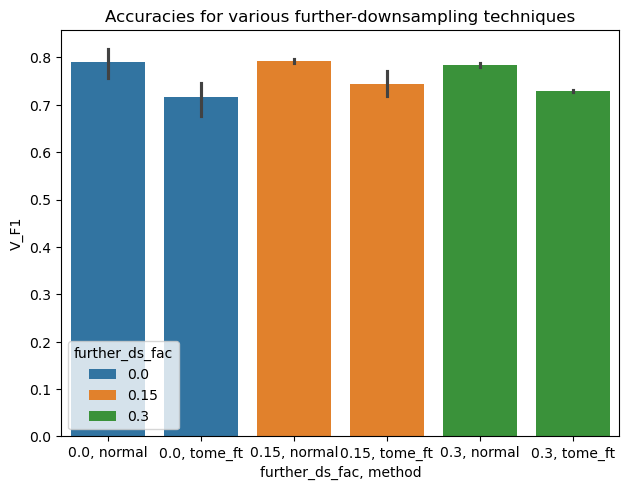

In [27]:
raw_models = model_bests[model_bests.method.isin(['normal','tome_ft'])].assign(further_ds_fac=0.0)
together = pd.concat([unpruned,pruned,raw_models],ignore_index=True)

def display_reslts(df,x:list,y,hue=None,**kwargs):
    df = df.copy()
    if type(x) is list:
        disp_name = ', '.join(x)
        df[disp_name] = df.apply(lambda row:', '.join(str(row[col]) for col in x),axis=1)
    else: 
        disp_name = x
    if type(hue) is list:
        hue_name = ', '.join(hue)
        df[hue_name] = df.apply(lambda row:', '.join(str(row[col]) for col in hue),axis=1)
    else: 
        hue_name = hue

    

    df = df.sort_values(x + hue)
    ax = sns.barplot(df,x=disp_name,y=y,hue=hue_name,**kwargs)
    ax.get_figure().tight_layout()
    return ax
    

ax = display_reslts(together[(together['model'] == 'pct') & (together['further_ds_fac'] <=0.4)]
               ,x=['further_ds_fac','method'],hue=['further_ds_fac'],y='V_F1')
ax.set_title('Accuracies for various further-downsampling techniques')
ax.get_figure().savefig('../figures/further_ds_accs.png')

<Axes: xlabel='model', ylabel='avg_time'>

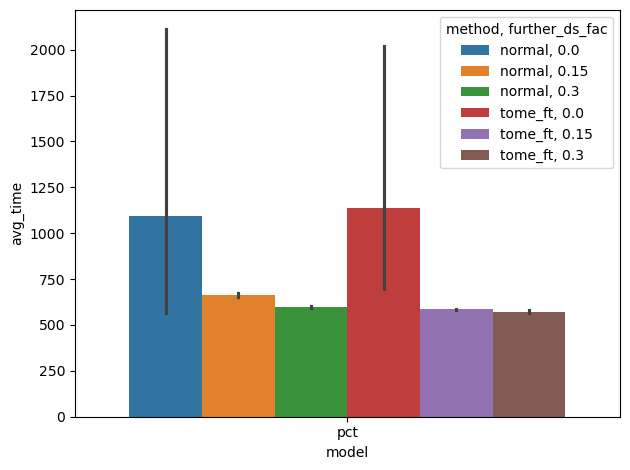

In [30]:
display_reslts(together[together.model=='pct'],x=['model'],hue=['method','further_ds_fac'],y='avg_time')

In [10]:
together.sort_values(['further_ds_fac','method','model'])

,step,T_Loss,T_Accuracy,T_Precision,T_Recall,T_F1,V_Loss,V_Accuracy,V_Precision,V_Recall,V_F1,Elapsed_time,elapsed_time,model,method,further_ds_fac,best_iter,avg_time,test_n
1,9973.0,0.501979,0.843976,0.744846,0.739116,0.736238,0.433624,0.856853,0.803961,0.805448,0.794149,11216.239,602.944,pct,normal,0.0,17,620.86015,NaN
3,11081.0,0.487944,0.846232,0.747441,0.73895,0.737417,0.486475,0.845685,0.808181,0.806719,0.798485,11166.741,565.121,pct,normal,0.0,19,558.33705,NaN
5,11081.0,0.500714,0.843231,0.742185,0.735291,0.733187,0.408607,0.870051,0.83147,0.834354,0.824753,11451.284,572.368,pct,normal,0.0,19,572.5642,NaN
25,5541.0,0.824604,0.768389,0.638056,0.633264,0.62851,0.619394,0.820305,0.77835,0.764133,0.743794,26239.013,2601.997,pct,normal,0.0,9,2623.9013,NaN
0,8311.0,0.472694,0.839824,0.736616,0.735941,0.730267,0.535037,0.845685,0.799035,0.762871,0.75848,11705.056,776.198,pt,normal,0.0,14,779.86275,NaN
2,11081.0,0.413964,0.862477,0.770462,0.767561,0.763322,0.448624,0.864975,0.823967,0.823732,0.801476,15139.37,742.343,pt,normal,0.0,19,756.9685,NaN
4,7203.0,0.516746,0.834161,0.729052,0.725753,0.721129,0.524898,0.84467,0.796422,0.78701,0.78272,9822.478,745.175,pt,normal,0.0,12,755.1033,NaN
27,16067.0,1.618725,0.508619,0.356293,0.373363,0.352542,1.514877,0.556345,0.494125,0.415145,0.414131,19333.839,643.8,pt,normal,0.0,28,665.566233,NaN
7,9419,0.858736,0.738064,0.605155,0.599798,0.59372,0.63497,0.812183,0.733607,0.72659,0.718804,11801.171,698.669,pct,tome_ft,0.0,16,691.94235,1.0
12,10527,0.8022,0.751151,0.623615,0.612834,0.610149,0.575383,0.831472,0.793775,0.756989,0.755582,13373.562,712.617,pct,tome_ft,0.0,18,704.51465,6.0


In [11]:
raw_models

,step,T_Loss,T_Accuracy,T_Precision,T_Recall,T_F1,V_Loss,V_Accuracy,V_Precision,V_Recall,V_F1,Elapsed_time,elapsed_time,model,method,best_iter,avg_time,further_ds_fac
test_n,,,,,,,,,,,,,,,,,,
0,5541.0,0.824604,0.768389,0.638056,0.633264,0.62851,0.619394,0.820305,0.77835,0.764133,0.743794,26239.013,2601.997,pct,normal,9,2623.9013,0.0
2,5541.0,1.040508,0.696232,0.547276,0.542901,0.536074,0.8149,0.771574,0.729036,0.675951,0.668677,25657.498,2738.76,pct,tome_xyz,9,2565.7498,0.0
4,16067.0,1.618725,0.508619,0.356293,0.373363,0.352542,1.514877,0.556345,0.494125,0.415145,0.414131,19333.839,643.8,pt,normal,28,665.566233,0.0
6,7757.0,1.902512,0.425064,0.268232,0.301405,0.266716,1.907813,0.428426,0.308518,0.288744,0.274661,15221.006,547.045,pt,tome_xyz,27,542.487933,0.0
